# CART 二叉树

## Classification

###### 常用参数

+ 参数的功能：防止模型过拟合或欠拟合，降低训练模型的时间复杂度；
    1. max_depth = 2：决策树模型的最高深度为 2；
    2. criterion = 'entropy'：划分节点数据集时，采用信息熵为判断条件；
    3. criterion = 'gini'：划分节点数据集时，采用基尼系数为判断条件；
    4. min_samples_split = 10：节点数据集中至少要有 10 个样本，才能继续对节点数据集进行划分；否则即使信息熵和基尼系数都比较大，也不在划分数据集；
    5. min_samples_leaf = 6：一个“叶子”节点，至少要有 6 个样本,一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生；
    6. max_leaf_nodes = 4：模型最多只能有 4 个“叶子”节点；


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
from sklearn import datasets 

X, y = datasets.make_moons(noise = 0.25, random_state = 666)

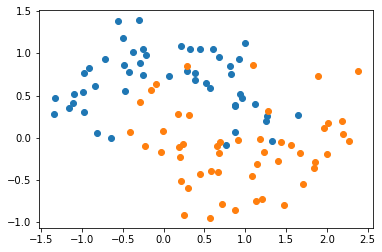

In [3]:
plt.scatter(X[y ==0, 0], X[y==0, 1])
plt.scatter(X[y ==1, 0], X[y==1, 1])
plt.show()

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

DecisionTreeClassifier()

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


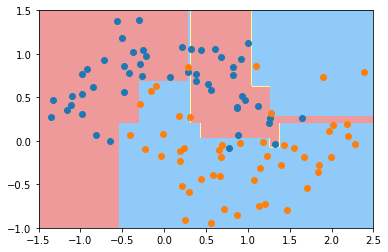

In [6]:
plot_decision_boundary(dt_clf, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [7]:
dt_clf2 = DecisionTreeClassifier(max_depth = 2)
dt_clf2.fit(X, y)

DecisionTreeClassifier(max_depth=2)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


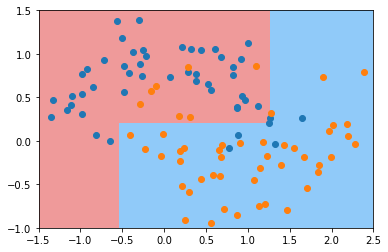

In [8]:
plot_decision_boundary(dt_clf2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [9]:
dt_clf3 = DecisionTreeClassifier(min_samples_split = 10)
dt_clf3.fit(X, y)

DecisionTreeClassifier(min_samples_split=10)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


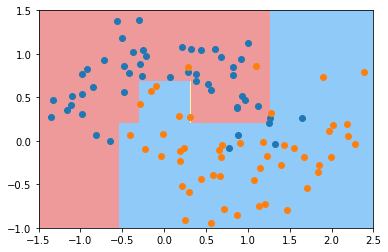

In [10]:
plot_decision_boundary(dt_clf3, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [11]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf = 6)
dt_clf4.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=6)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


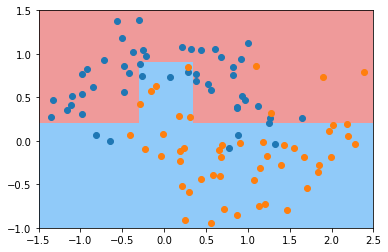

In [12]:
plot_decision_boundary(dt_clf4, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [13]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes = 4)
dt_clf5.fit(X, y)

DecisionTreeClassifier(max_leaf_nodes=4)

/Users/yasmine/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


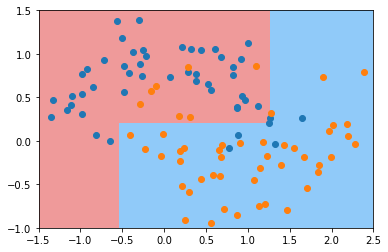

In [14]:
plot_decision_boundary(dt_clf5, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

## Regression

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [16]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [18]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [19]:
dt_reg.score(X_test, y_test)

0.5853645290723282

In [20]:
dt_reg.score(X_train, y_train)

1.0

#### Adjust Parameter

In [21]:
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)],
            np.sqrt(test_score), label="test")
    
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

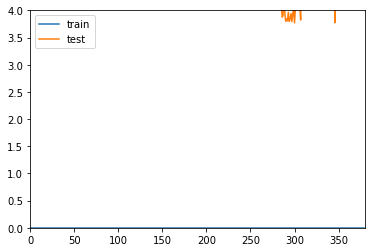

In [22]:
plot_learning_curve(dt_reg, X_train, X_test, y_train, y_test)

In [23]:
dt_reg2 = DecisionTreeRegressor(min_samples_leaf = 2)
dt_reg2.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=2)

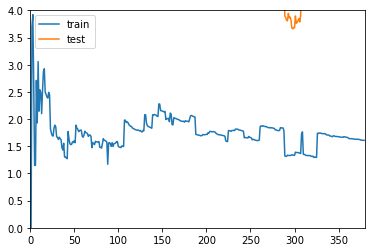

In [24]:
plot_learning_curve(dt_reg2, X_train, X_test, y_train, y_test)